# Home Score Card Model

Home Credit Indonesia strives to make predictions through alternative data using various statistical methods and Machine Learning. The prediction model is expected to be able to determine which customers who are able to repay are not rejected when applying for a loan, and loans can be given with a principal, maturity, and repayment calendar that will motivate customers to succeed.

**Objective**
1. Identify customers who have difficulty in repaying loans.
2. Predict customers who have the capacity to repay their loans.

**Goals**
1. Perform data cleaning, data visualization and build prediction models with machine learning.
2. Predict customer repayment ability with the best machine learning model.
3. Provide recommendations to the company to increase customer success in the next loan application.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
def minimize_mem(df):
    
    initial_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe: {:.2f} MB'.format(initial_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    final_mem = df.memory_usage().sum() / 1024**2
    
    print('After optimization: {:.2f} MB'.format(final_mem))
    
    return df

def import_df(file):
    df = pd.read_csv(file)
    df = minimize_mem(df)
    return df

In [3]:
app_train = import_df('C:\\Users\\Administrator\\Documents\\Rakamin\\train_fix.csv')
app_train.head()

Memory usage of dataframe: 506.76 MB
After optimization: 134.61 MB


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,PREV_CRE_AMT_RECIVABLE,PREV_CRE_AMT_TOTAL_RECEIVABLE,PREV_CRE_CNT_DRAWINGS_ATM_CURRENT,PREV_CRE_CNT_DRAWINGS_CURRENT,PREV_CRE_CNT_DRAWINGS_OTHER_CURRENT,PREV_CRE_CNT_DRAWINGS_POS_CURRENT,PREV_CRE_CNT_INSTALMENT_MATURE_CUM,PREV_CRE_NAME_CONTRACT_STATUS,PREV_CRE_SK_DPD,PREV_CRE_SK_DPD_DEF
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
app_test = import_df('C:\\Users\\Administrator\\Documents\\Rakamin\\test_fix.csv')
app_test.head()

Memory usage of dataframe: 79.96 MB
After optimization: 21.29 MB


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,PREV_CRE_AMT_RECIVABLE,PREV_CRE_AMT_TOTAL_RECEIVABLE,PREV_CRE_CNT_DRAWINGS_ATM_CURRENT,PREV_CRE_CNT_DRAWINGS_CURRENT,PREV_CRE_CNT_DRAWINGS_OTHER_CURRENT,PREV_CRE_CNT_DRAWINGS_POS_CURRENT,PREV_CRE_CNT_INSTALMENT_MATURE_CUM,PREV_CRE_NAME_CONTRACT_STATUS,PREV_CRE_SK_DPD,PREV_CRE_SK_DPD_DEF
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,7968.608887,7968.608887,0.045441,2.388672,0.0,2.613281,19.546875,0.0,0.0,0.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Wrangling

## Assesing Data

In [7]:
app_train.shape

(307511, 216)

In [8]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 216 entries, SK_ID_CURR to PREV_CRE_SK_DPD_DEF
dtypes: float16(121), float32(38), int16(2), int32(2), int8(53)
memory usage: 134.6 MB


In [9]:
app_train.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,PREV_CRE_AMT_RECIVABLE,PREV_CRE_AMT_TOTAL_RECEIVABLE,PREV_CRE_CNT_DRAWINGS_ATM_CURRENT,PREV_CRE_CNT_DRAWINGS_CURRENT,PREV_CRE_CNT_DRAWINGS_OTHER_CURRENT,PREV_CRE_CNT_DRAWINGS_POS_CURRENT,PREV_CRE_CNT_INSTALMENT_MATURE_CUM,PREV_CRE_NAME_CONTRACT_STATUS,PREV_CRE_SK_DPD,PREV_CRE_SK_DPD_DEF
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,77934.000000,77934.000000,52930.000000,77934.000000,52930.000000,5.293000e+04,77934.000000,77934.000000,77934.0,77934.000000
mean,278180.518577,0.080729,0.095213,0.341669,0.340108,0.693673,0.417052,1.687979e+05,5.990259e+05,27108.572266,...,75101.109375,75101.984375,0.629883,NaN,0.007687,inf,NaN,0.000000,NaN,0.000000
std,102790.175348,0.272419,0.293509,0.474297,0.473746,0.460968,0.722121,2.371759e+05,4.024795e+05,14493.233398,...,112963.343750,112963.578125,0.928711,0.000000,0.050415,4.546875e+00,0.000000,0.283691,NaN,0.328613
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,-2930.232666,-2930.232666,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.083313,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,28552.216797,28552.216797,0.329590,0.268799,0.000000,1.363525e-01,3.111328,0.000000,0.0,0.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,105341.164062,105341.164062,0.833496,1.599609,0.000000,2.000000e+00,10.976562,0.000000,0.0,0.000000
max,456255.000000,1.000000,1.000000,2.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,...,913096.625000,913096.625000,35.000000,118.250000,2.000000,1.182500e+02,48.000000,6.000000,1342.0,63.843750


In [ ]:
app_train.CODE_GENDER.replace(2, app_train.CODE_GENDER.median(), inplace=True)

In [10]:
app_test.shape

(48744, 215)

In [11]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 215 entries, SK_ID_CURR to PREV_CRE_SK_DPD_DEF
dtypes: float16(121), float32(38), int16(2), int32(2), int8(52)
memory usage: 21.3 MB


In [12]:
app_test.describe()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,PREV_CRE_AMT_RECIVABLE,PREV_CRE_AMT_TOTAL_RECEIVABLE,PREV_CRE_CNT_DRAWINGS_ATM_CURRENT,PREV_CRE_CNT_DRAWINGS_CURRENT,PREV_CRE_CNT_DRAWINGS_OTHER_CURRENT,PREV_CRE_CNT_DRAWINGS_POS_CURRENT,PREV_CRE_CNT_INSTALMENT_MATURE_CUM,PREV_CRE_NAME_CONTRACT_STATUS,PREV_CRE_SK_DPD,PREV_CRE_SK_DPD_DEF
count,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,...,14513.000000,14513.000000,9094.000000,14513.000000,9094.000000,9094.000000,1.451300e+04,14513.000000,1.451300e+04,14513.000000
mean,277796.676350,0.009006,0.329600,0.337129,0.690505,0.397054,1.784318e+05,5.167404e+05,29426.238281,4.626188e+05,...,66064.312500,66064.531250,0.507324,1.556641,0.006241,2.216797,inf,0.119751,1.979492e+00,0.069763
std,103169.547296,0.094474,0.470073,0.472734,0.462290,0.709047,1.015237e+05,3.653976e+05,16016.254883,3.366994e+05,...,103689.304688,103689.203125,0.707031,3.667969,0.044922,4.683594,9.578125e+00,0.345947,inf,2.533203
min,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,...,-257.220001,-257.220001,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,188557.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,...,0.000000,0.000000,0.060242,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,277549.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,...,14831.651367,14831.651367,0.269043,0.205933,0.000000,0.333252,2.500000e+00,0.000000,0.000000e+00,0.000000
75%,367555.500000,0.000000,1.000000,1.000000,1.000000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,...,97019.187500,97019.187500,0.688477,1.454102,0.000000,2.400391,7.691406e+00,0.000000,0.000000e+00,0.000000
max,456250.000000,1.000000,1.000000,1.000000,1.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,...,820603.500000,820603.500000,17.000000,87.250000,2.000000,87.250000,4.800000e+01,6.000000,8.015000e+02,233.375000


In [13]:
print("Null columns \n", app_train.isna().sum())
print("\nDuplicated row: ", app_train.duplicated().sum())

Null columns 
 SK_ID_CURR                                 0
TARGET                                     0
NAME_CONTRACT_TYPE                         0
CODE_GENDER                                0
FLAG_OWN_CAR                               0
                                       ...  
PREV_CRE_CNT_DRAWINGS_POS_CURRENT     254581
PREV_CRE_CNT_INSTALMENT_MATURE_CUM    229577
PREV_CRE_NAME_CONTRACT_STATUS         229577
PREV_CRE_SK_DPD                       229577
PREV_CRE_SK_DPD_DEF                   229577
Length: 216, dtype: int64

Duplicated row:  0


In [14]:
print("Null columns \n", app_test.isna().sum())
print("\nDuplicated row: ", app_test.duplicated().sum())

Null columns 
 SK_ID_CURR                                0
NAME_CONTRACT_TYPE                        0
CODE_GENDER                               0
FLAG_OWN_CAR                              0
FLAG_OWN_REALTY                           0
                                      ...  
PREV_CRE_CNT_DRAWINGS_POS_CURRENT     39650
PREV_CRE_CNT_INSTALMENT_MATURE_CUM    34231
PREV_CRE_NAME_CONTRACT_STATUS         34231
PREV_CRE_SK_DPD                       34231
PREV_CRE_SK_DPD_DEF                   34231
Length: 215, dtype: int64

Duplicated row:  0


## Cleaning Data

In [17]:
## function for looking precentage of missing values in df
def miss_percent(df):
    result = (df.isnull().sum().sum() / df.size) * 100
    return result

#function for looking precentage of missing values in columns
def in_col(df):
    percent = df.isnull().sum() / len(df)
    result_df = pd.DataFrame({'column_index': percent.index, 'percentage': percent.values})
    result_df = result_df.sort_values(by='percentage', ascending=False)

    return result_df

In [18]:
miss_percent(app_train)

25.93956590772965

In [19]:
train_miss = in_col(app_train)
train_miss.head(10)

,column_index,percentage
203,PREV_CRE_AMT_PAYMENT_CURRENT,0.828162
211,PREV_CRE_CNT_DRAWINGS_POS_CURRENT,0.827876
210,PREV_CRE_CNT_DRAWINGS_OTHER_CURRENT,0.827876
208,PREV_CRE_CNT_DRAWINGS_ATM_CURRENT,0.827876
198,PREV_CRE_AMT_DRAWINGS_ATM_CURRENT,0.827876
200,PREV_CRE_AMT_DRAWINGS_OTHER_CURRENT,0.827876
201,PREV_CRE_AMT_DRAWINGS_POS_CURRENT,0.827876
215,PREV_CRE_SK_DPD_DEF,0.746565
194,PREV_CRE_SK_ID_CURR,0.746565
195,PREV_CRE_MONTHS_BALANCE,0.746565


In [20]:
train_miss.column_index[train_miss.percentage > 0.7].to_list()

['PREV_CRE_AMT_PAYMENT_CURRENT',
 'PREV_CRE_CNT_DRAWINGS_POS_CURRENT',
 'PREV_CRE_CNT_DRAWINGS_OTHER_CURRENT',
 'PREV_CRE_CNT_DRAWINGS_ATM_CURRENT',
 'PREV_CRE_AMT_DRAWINGS_ATM_CURRENT',
 'PREV_CRE_AMT_DRAWINGS_OTHER_CURRENT',
 'PREV_CRE_AMT_DRAWINGS_POS_CURRENT',
 'PREV_CRE_SK_DPD_DEF',
 'PREV_CRE_SK_ID_CURR',
 'PREV_CRE_MONTHS_BALANCE',
 'PREV_CRE_AMT_BALANCE',
 'PREV_CRE_AMT_CREDIT_LIMIT_ACTUAL',
 'PREV_CRE_AMT_DRAWINGS_CURRENT',
 'PREV_CRE_AMT_INST_MIN_REGULARITY',
 'PREV_CRE_AMT_RECEIVABLE_PRINCIPAL',
 'PREV_CRE_AMT_PAYMENT_TOTAL_CURRENT',
 'PREV_CRE_AMT_RECIVABLE',
 'PREV_CRE_AMT_TOTAL_RECEIVABLE',
 'PREV_CRE_CNT_DRAWINGS_CURRENT',
 'PREV_CRE_CNT_INSTALMENT_MATURE_CUM',
 'PREV_CRE_NAME_CONTRACT_STATUS',
 'PREV_CRE_SK_DPD',
 'BURE_Blc_STATUS__4',
 'BURE_Blc_STATUS__0',
 'BURE_Blc_MONTHS_BALANCE',
 'BURE_Blc_STATUS__1',
 'BURE_Blc_STATUS__3',
 'BURE_Blc_STATUS__2',
 'BURE_Blc_STATUS__5',
 'BURE_Blc_STATUS__C',
 'BURE_Blc_STATUS__X']

In [21]:
app_train.drop(columns=train_miss.column_index[train_miss.percentage > 0.7].to_list(), inplace=True)
app_train.shape

(307511, 185)

In [27]:
for col in train_miss.column_index[(train_miss.percentage > 0) & (train_miss.percentage <= 0.7)].to_list():
    app_train[col] = app_train[col].fillna(app_train[col].median())

In [28]:
app_train.isna().sum().sum()

0

In [29]:
miss_percent(app_test)

22.050952484551466

In [30]:
test_miss = in_col(app_test)
test_miss.head(10)

,column_index,percentage
210,PREV_CRE_CNT_DRAWINGS_POS_CURRENT,0.813433
209,PREV_CRE_CNT_DRAWINGS_OTHER_CURRENT,0.813433
197,PREV_CRE_AMT_DRAWINGS_ATM_CURRENT,0.813433
207,PREV_CRE_CNT_DRAWINGS_ATM_CURRENT,0.813433
199,PREV_CRE_AMT_DRAWINGS_OTHER_CURRENT,0.813433
200,PREV_CRE_AMT_DRAWINGS_POS_CURRENT,0.813433
202,PREV_CRE_AMT_PAYMENT_CURRENT,0.813331
214,PREV_CRE_SK_DPD_DEF,0.702261
194,PREV_CRE_MONTHS_BALANCE,0.702261
195,PREV_CRE_AMT_BALANCE,0.702261


In [31]:
test_miss.column_index[test_miss.percentage > 0.7].to_list()

['PREV_CRE_CNT_DRAWINGS_POS_CURRENT',
 'PREV_CRE_CNT_DRAWINGS_OTHER_CURRENT',
 'PREV_CRE_AMT_DRAWINGS_ATM_CURRENT',
 'PREV_CRE_CNT_DRAWINGS_ATM_CURRENT',
 'PREV_CRE_AMT_DRAWINGS_OTHER_CURRENT',
 'PREV_CRE_AMT_DRAWINGS_POS_CURRENT',
 'PREV_CRE_AMT_PAYMENT_CURRENT',
 'PREV_CRE_SK_DPD_DEF',
 'PREV_CRE_MONTHS_BALANCE',
 'PREV_CRE_AMT_BALANCE',
 'PREV_CRE_AMT_CREDIT_LIMIT_ACTUAL',
 'PREV_CRE_AMT_DRAWINGS_CURRENT',
 'PREV_CRE_AMT_INST_MIN_REGULARITY',
 'PREV_CRE_SK_ID_CURR',
 'PREV_CRE_AMT_PAYMENT_TOTAL_CURRENT',
 'PREV_CRE_AMT_RECIVABLE',
 'PREV_CRE_AMT_TOTAL_RECEIVABLE',
 'PREV_CRE_CNT_DRAWINGS_CURRENT',
 'PREV_CRE_AMT_RECEIVABLE_PRINCIPAL',
 'PREV_CRE_CNT_INSTALMENT_MATURE_CUM',
 'PREV_CRE_NAME_CONTRACT_STATUS',
 'PREV_CRE_SK_DPD']

In [32]:
app_test.drop(columns=test_miss.column_index[test_miss.percentage > 0.7].to_list(), inplace=True)
app_test.shape

(48744, 193)

In [33]:
for col in test_miss.column_index[(test_miss.percentage > 0) & (test_miss.percentage <= 0.7)].to_list():
    app_test[col] = app_test[col].fillna(app_test[col].median())

In [34]:
app_test.isna().sum().sum()

0

In [102]:
app_train.to_csv("final_train.csv", index=False)
app_test.to_csv("final_test.csv", index=False)

# Data Visualization

In [38]:
sns.set(rc = {'figure.figsize':(6,5)})
sns.set_theme(context="talk")
sns.set_style("whitegrid", {'axes.edgecolor': '.6','axes.grid': False,'xtick.bottom': True,'ytick.left': True})

In [39]:
app_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,PREV_POS_NAME_CONTRACT_STATUS,PREV_POS_SK_DPD,PREV_POS_SK_DPD_DEF,PREV_INST_SK_ID_CURR,PREV_INST_NUM_INSTALMENT_VERSION,PREV_INST_NUM_INSTALMENT_NUMBER,PREV_INST_DAYS_INSTALMENT,PREV_INST_DAYS_ENTRY_PAYMENT,PREV_INST_AMT_INSTALMENT,PREV_INST_AMT_PAYMENT
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0.000000,0.0000,0.000000,100002.0,1.052734,10.000000,-295.00,-315.5,11559.247070,11559.247070
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0.333252,0.0000,0.000000,100003.0,1.047852,4.667969,-1164.00,-1172.0,78558.484375,78558.484375
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,1.000000,0.0000,0.000000,100004.0,1.333008,2.000000,-754.00,-761.5,7096.154785,7096.154785
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0.861328,0.0000,0.000000,100006.0,1.400391,3.166016,-260.75,-286.0,241944.234375,241944.234375
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0.275146,0.0000,0.000000,100007.0,1.129883,6.843750,-1088.00,-1091.0,12122.995117,11671.539062
5,100008,0,0,1,0,1,0,99000.0,490495.5,27517.5,...,0.563965,127.9375,0.000000,100008.0,1.031250,4.851562,-1319.00,-1302.0,28547.511719,28275.099609
6,100009,0,0,0,1,1,1,171000.0,1560726.0,41301.0,...,0.422363,0.0000,0.000000,100009.0,1.000000,3.857422,-602.50,-612.0,10050.262695,10050.262695
7,100010,0,0,1,1,1,0,360000.0,1530000.0,42075.0,...,0.363525,0.0000,0.000000,100010.0,1.000000,5.500000,-904.00,-916.0,27449.208984,27449.208984
8,100011,0,0,0,0,1,0,112500.0,1019610.0,33826.5,...,0.111084,171.3750,0.288818,100011.0,0.666504,21.187500,-1361.00,-1346.0,16872.439453,13467.096680
9,100012,0,1,1,0,1,0,135000.0,405000.0,20250.0,...,0.293945,0.0000,0.000000,100012.0,1.964844,7.890625,-766.50,-789.0,8743.124023,9911.797852


In [40]:
for col in app_train.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

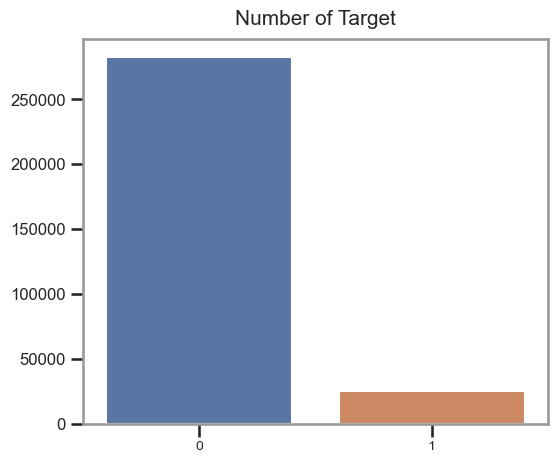

In [62]:
sns.countplot(x='TARGET', data=app_train)
plt.title("Number of Target", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Target label distribution has imbalance condition, which needs some treatment before modeling process

In [60]:
app_train.CODE_GENDER.value_counts()

CODE_GENDER
0    202452
1    105059
Name: count, dtype: int64

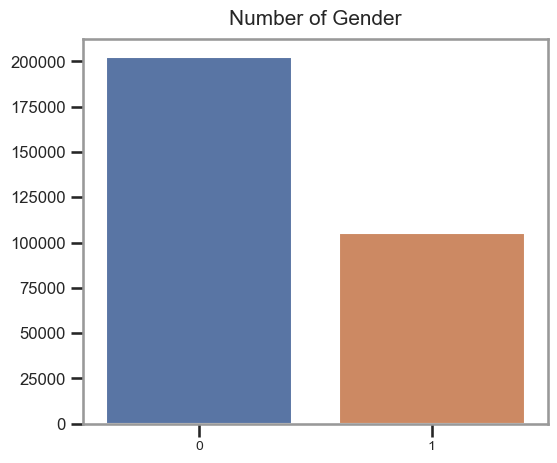

In [61]:
sns.countplot(x='CODE_GENDER', data=app_train)
plt.title("Number of Gender", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**0 is female and 1 male**
- The visualization results show that females loan more credit than males.

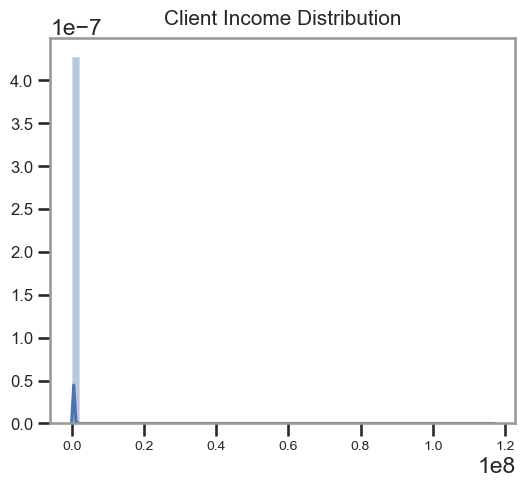

In [66]:
sns.distplot(app_train['AMT_INCOME_TOTAL'])
plt.title("Client Income Distribution", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

there may be outliers that make the data distribution less visible.

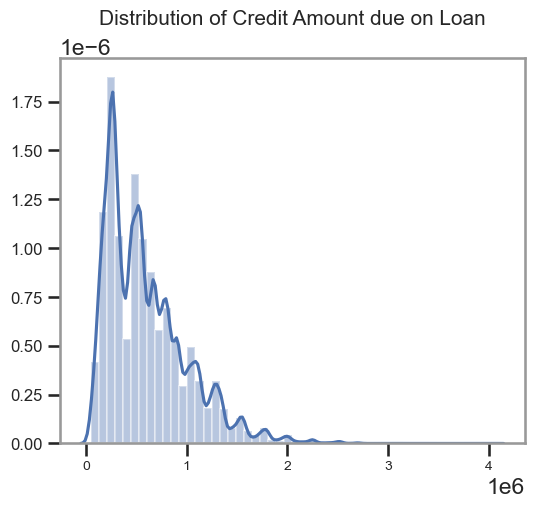

In [70]:
sns.distplot(app_train['AMT_CREDIT'])
plt.title("Distribution of Credit Amount due on Loan", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

The number of client credits is mostly below 1000000

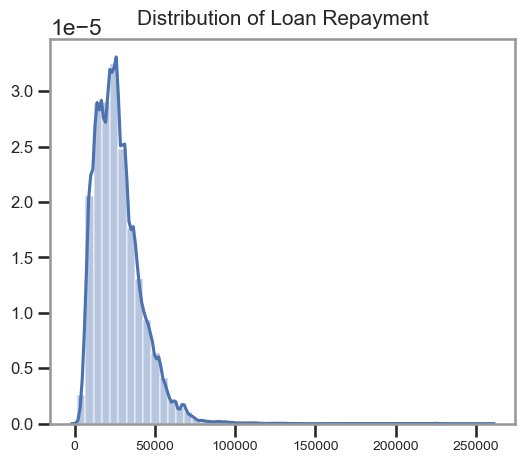

In [71]:
sns.distplot(app_train['AMT_ANNUITY'])
plt.title("Distribution of Loan Repayment", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

The average client only pays a balance of no more than 50000.

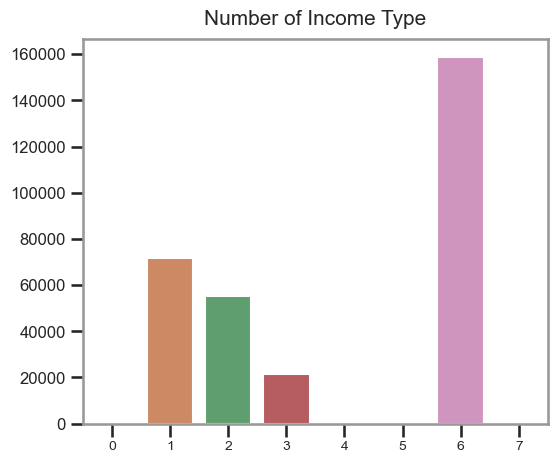

In [95]:
sns.countplot(x='NAME_INCOME_TYPE', data=app_train)
plt.title("Number of Income Type", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [100]:
app_train.NAME_INCOME_TYPE.value_counts().sort_index()

NAME_INCOME_TYPE
0        10
1     71617
2     55362
3     21703
4        18
5        22
6    158774
7         5
Name: count, dtype: int64

- 0 is Businessman
- 1 is Commercial Associate
- 2 is Pensioner
- 3 is State Servant
- 4 is Student
- 5 is Unemployed
- 6 is Working
- 7 is Maternity Leave<br>
Clients who made the most loans had an income as a worker of 158,774 and the least from a maternity leave..

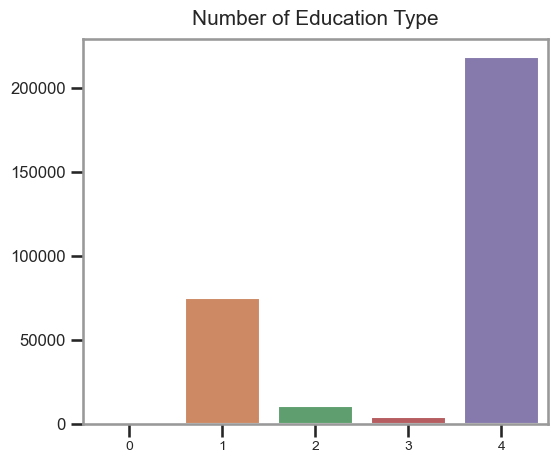

In [72]:
sns.countplot(x='NAME_EDUCATION_TYPE', data=app_train)
plt.title("Number of Education Type", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

- 0 is Academic Degree
- 1 is Lower Secondary
- 2 is Incomplete Higher
- 3 is Higher Education
- 4 is Secondary Special<br>
Clients who make loans mostly have a Secondary Special education background with a total of 218390 and the least from an academic degree education as many as 163 clients.

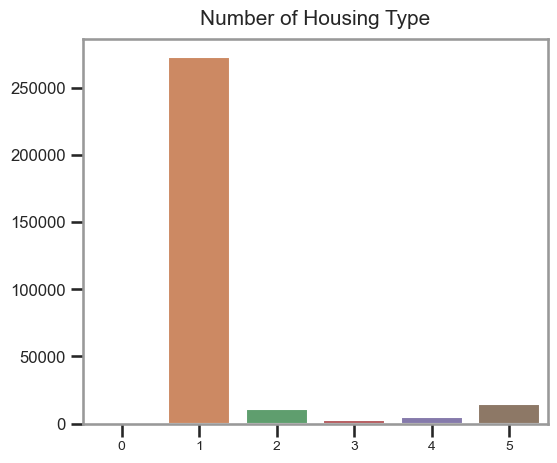

In [73]:
sns.countplot(x='NAME_HOUSING_TYPE', data=app_train)
plt.title("Number of Housing Type", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

- 0 is Co-op Apartment
- 1 is House/Apartment
- 2 is Municipal Apartment
- 3 is Office Apartment
- 4 is Rented Apartment
- 5 is With Parents<br>
Clients who made the most loans stayed in houses/apartments with a total of 272869 and the fewest stayed in Co-op Apartments as many as 1123 clients.

In [79]:
age_0 = app_train.DAYS_BIRTH[app_train.TARGET == 0].values/-365
age_1 = app_train.DAYS_BIRTH[app_train.TARGET == 1].values/-365

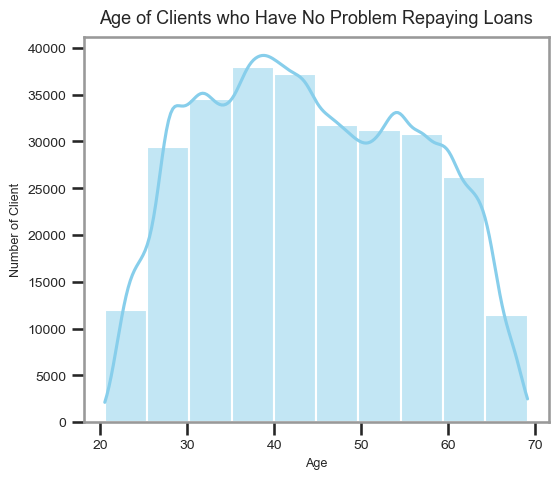

In [94]:
sns.histplot(age_0, bins=10, kde=True, color='skyblue')
plt.title("Age of Clients who Have No Problem Repaying Loans", loc="center", fontsize=13, pad=10)
plt.ylabel("Number of Client", fontsize=9)
plt.xlabel("Age", fontsize=9)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show()

Clients who have no payments dificulties are client in the range of 35 - 45 years

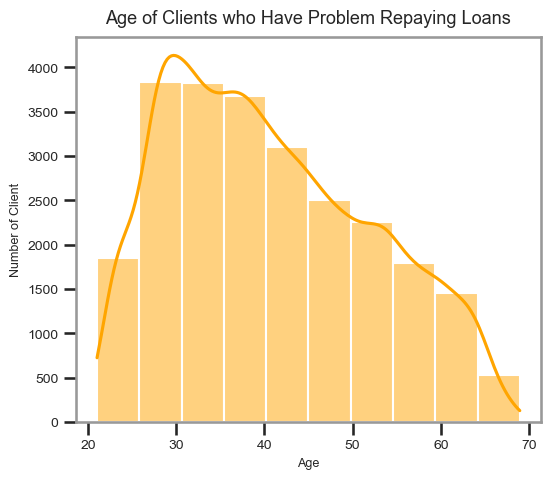

In [92]:
sns.histplot(age_1, bins=10, kde=True, color='orange')
plt.title("Age of Clients who Have Problem Repaying Loans", loc="center", fontsize=13, pad=10)
plt.ylabel("Number of Client", fontsize=9)
plt.xlabel("Age", fontsize=9)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show()

Clients who have payments dificulties are client in the range of 25 - 35 years

# Recomendation

1. Put a limit on the age that can take a loan, between 30 - 50 so that loan repayment can be smoother
2. If there are underage clients making loans, provide special conditions so that loan payments can be made immediately.
3. For clients who have income only as casual workers, please give the option to make a loan but with a certain loan limit.